In [ ]:
!pip install simpleaudio
!pip install numpy
!pip install matplotlib

import numpy as np
import simpleaudio as sa
import matplotlib.pyplot as plt

# Nanobody sequence from PDB entry 5JDS (Chain A)
nanobody_seq = "TGQVQLQESGGGLVQPGGSLRLSCAASGKMSSRRCMAWFRQAPGKERERVAKLLTTSGSTYLADSVKGRFTISQNNAKSTVYLQMNSLKPEDTAMYYCAADSFEDPTCTLVTSSGAFQYWGQGTQVTVSSGSMDPGGSHHHHHHHH"

# This is the KN035 antibody. See also https://www.rcsb.org/structure/5JDS

# Vibration frequencies mapped to amino acids
# vibration_freq = {
  #  'A': 440,  'R': 466,  'N': 494,  'D': 523,  'C': 554,
  #  'Q': 587,  'E': 622,  'G': 659,  'H': 698,  'I': 740,
  #  'L': 784,  'K': 830,  'M': 880,  'F': 932,  'P': 988,
  #  'S': 1046, 'T': 1108, 'W': 1174, 'Y': 1244, 'V': 1318
# } (these are randomly selected frequencies)

vibration_freq = {
    'A': 329.628,  'R': 138.591,  'N': 82.4069,  'D': 246.924,  'C': 293.665,
    'Q': 146.832,  'E': 110,  'G': 369.994,  'H': 146.832,  'I': 293.665,
    'L': 77.7817,  'K': 246.942,  'M': 880,  'F': 164.814,  'P': 116.541,
    'S': 195.998, 'T': 293.665, 'W': 130.813, 'Y': 61.7354, 'V': 246.942
}
# These are frequencies based on the table below, but are rounded to the nearest
# chromatic note in the 12-tone system

# This is the table of frequencies adapted from Fig 2B from the 2019 article: https://docs.google.com/document/d/14w7nL8gZa5aRMq3MBTSnGYVe97Cw_qGt5n2_ttD_bxs/edit?tab=t.0
# See the full article here: https://drive.google.com/file/d/1rJk4AqWC1nzSYSVIQHlOXPD9ONLDFggA/view
# See Hz to note reference chart here: https://doctormix.com/blog/note-to-frequency-chart/

# Hydrogen-bonding residue positions (1-based index)
hbond_residues = [30, 32, 56, 58, 66, 113, 119, 125]



# Generate vibrational frequencies from amino acid sequence
frequencies = [vibration_freq[aa] for aa in nanobody_seq if aa in vibration_freq]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp311-cp311-linux_x86_64.whl size=2054418 sha256=ca4320611767a40f2429037fd91a90906c5b738c23ccf5e3b41fa3aa1f8483c4
  Stored in directory: /root/.cache/pip/wheels/44/74/11/9d2cf6ddf5d0dcc7750484a371b92fdb036f5496d1d4b42d08
Successfully built simpleaudio


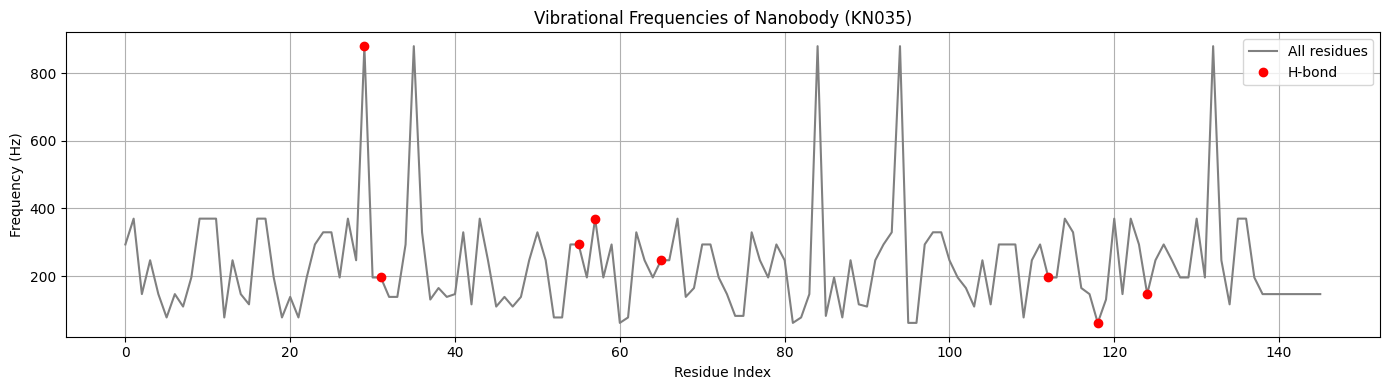

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(frequencies, color='gray', label='All residues')

for i in hbond_residues:
    if i - 1 < len(frequencies):
        plt.plot(i - 1, frequencies[i - 1], 'ro', label='H-bond' if i == hbond_residues[0] else "")

plt.title("Vibrational Frequencies of Nanobody (KN035)")
plt.xlabel("Residue Index")
plt.ylabel("Frequency (Hz)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.io import wavfile  # NEW

def generate_audio_array(frequencies, hbond_residues, duration=0.4):
    sample_rate = 44100
    full_audio = np.array([], dtype=np.int16)

    for i, freq in enumerate(frequencies):
        t = np.linspace(0, duration, int(sample_rate * duration), False)
        tone = np.sin(freq * 2 * np.pi * t) * 0.3

        if (i + 1) in hbond_residues:
            tone += np.sin(2 * np.pi * 4000 * t) * 0.1
            print(f"Residue {i+1}: {freq} Hz  <-- Hydrogen bond!")
        else:
            print(f"Residue {i+1}: {freq} Hz")

        tone = (tone * 32767).astype(np.int16)
        full_audio = np.concatenate((full_audio, tone))

    return full_audio, sample_rate


In [ ]:
# Generate audio
audio_array, sample_rate = generate_audio_array(frequencies, hbond_residues)

# Save to .wav
wavfile.write("nanobody_sequence.wav", sample_rate, audio_array)

print("✅ Saved to nanobody_sequence.wav")

# Optional: play it
# import simpleaudio as sa
# sa.play_buffer(audio_array, 1, 2, sample_rate)
# Note: Playing doesn't work on Colab
# To play, click on "Files" to the left
# Then download "nanobody_sequence.wav"
# And play locally on your computer

Residue 1: 293.665 Hz
Residue 2: 369.994 Hz
Residue 3: 146.832 Hz
Residue 4: 246.942 Hz
Residue 5: 146.832 Hz
Residue 6: 77.7817 Hz
Residue 7: 146.832 Hz
Residue 8: 110 Hz
Residue 9: 195.998 Hz
Residue 10: 369.994 Hz
Residue 11: 369.994 Hz
Residue 12: 369.994 Hz
Residue 13: 77.7817 Hz
Residue 14: 246.942 Hz
Residue 15: 146.832 Hz
Residue 16: 116.541 Hz
Residue 17: 369.994 Hz
Residue 18: 369.994 Hz
Residue 19: 195.998 Hz
Residue 20: 77.7817 Hz
Residue 21: 138.591 Hz
Residue 22: 77.7817 Hz
Residue 23: 195.998 Hz
Residue 24: 293.665 Hz
Residue 25: 329.628 Hz
Residue 26: 329.628 Hz
Residue 27: 195.998 Hz
Residue 28: 369.994 Hz
Residue 29: 246.942 Hz
Residue 30: 880 Hz  <-- Hydrogen bond!
Residue 31: 195.998 Hz
Residue 32: 195.998 Hz  <-- Hydrogen bond!
Residue 33: 138.591 Hz
Residue 34: 138.591 Hz
Residue 35: 293.665 Hz
Residue 36: 880 Hz
Residue 37: 329.628 Hz
Residue 38: 130.813 Hz
Residue 39: 164.814 Hz
Residue 40: 138.591 Hz
Residue 41: 146.832 Hz
Residue 42: 329.628 Hz
Residue 43: 116

In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
# This doesn't work for some reason--don't run this code
# You can download the .wav file from the files folder to the left
# Then run in through https://basicpitch.spotify.com/ to convert to midi
# And then play the midi/examine the score in muse score: https://musescore.org/en

# !pip install basic_pitch
# from basic_pitch import basic_pitch


# Define input and output paths
# audio_file = "nanobody_sequence.wav"
# output_dir = "midi_output"
# os.makedirs(output_dir, exist_ok=True)

# Transcribe the audio
# midi_data = basic_pitch.predict(audio_file)

# Save the MIDI file
# midi_output_path = os.path.join(output_dir, "nanobody_sequence.mid")
# midi_data.write(midi_output_path)
# print(f"MIDI file saved to: {midi_output_path}")